## Julia part (30 marks)

In the folder `Penguin_data` you find two datasets (csv formatted files) about at-sea observations of seabirds dating from 1969 to 1990 in New Zealand. You can find more information here: https://catalogue.data.govt.nz/dataset/at-sea-observations-of-seabirds-1969-to-1990

This is true-life messy data. Handle with care ;-)

Your task for this part is to load the data, wrangle it a bit, and answer a couple of question.

_hint_ this is the moment to go back to the Julia notebooks for lab 1 to 4.

### Load the data (5 marks)

Load the two dataset into two separate data frames.

_hint_ take a look at the package `CSV.jl` and `DataFrames.jl`.

I can starting to add package and using after using using Pkg

In [66]:
using Pkg

To load and use package - "DataFrames"

In [67]:
Pkg.add("DataFrames")
using DataFrames

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


To load and use package - "CSV"

In [68]:
Pkg.add("CSV")
using CSV

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


I can read the files by using function CSV.read("file_name")

In [69]:
df_bird = CSV.read("Penguin_dataBird_data.csv") 
df_ship = CSV.read("Penguin_dataShip_data.csv")
describe(df_ship)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,RECORD,6155.5,1,6155.5,12310,,,Int64
2,RECORDID,3.98201e7,1083001,1.203e7,88007036,,,Int64
3,DATE,,1/01/1980,,9/12/1988,1435,,String
4,TIME,,00:00:00,,23:30:00,315,2,"Union{Missing, Time}"
5,LAT,-39.2204,-69.0,-38.267,-19.0,,10,"Union{Missing, Float64}"
6,LONG,159.93,50.0,163.117,179.983,,11,"Union{Missing, Float64}"
7,EW,,E,,W,2,11,"Union{Missing, String}"
8,SACT,1.37287,1,1.0,9,,,Int64
9,SPEED,12.7112,0.0,14.5,22.0,,4478,"Union{Missing, Float64}"


### Join the data (5 marks)

Join the two dataframes into one.

_hint_ there is one column being an ID: which one?

I took RECORDID as the ID, because I can see the RECORDID exists in both files

In [70]:
df_joined = join(df_bird, df_ship, on=:RECORDID, kind=:inner, makeunique=true)


,RECORD,RECORDID,SpeciesCommonName,SpeciesScientificName
,Int64,Int64,String,String?
1,1,1083001,Royal / Wandering albatross,Diomedea epomophora / sanfordi / antipodensis / exulans
2,2,1083001,Black-browed albatross sensu lato,Diomedea impavida / melanophrys
3,3,1083001,Cape petrel,Daption capense
4,4,1083001,Fairy prion,Pachyptila turtur
5,5,1083001,Sooty shearwater,Puffinus griseus
6,6,1084001,Royal albatross sensu lato,Diomedea epomophora / sanfordi
7,7,1084001,Black-browed albatross sensu lato,Diomedea impavida / melanophrys
8,8,1084001,Sooty shearwater,Puffinus griseus
9,9,1084002,Royal albatross sensu lato,Diomedea epomophora / sanfordi


### Question 1 (10 marks)

In which season would say we see more Little penguins?

_hint_ their scientific name is _Eudyptula minor_ and their Species abbreviation is "EUDMIN".

_hint_ you may want to use the package `Query.jl`.

To load and use package - "DataFrames"
I will use group_by() function later. 

In [71]:
Pkg.add("Query")
using Query
using DataFrames
using Dates

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


To find out which season can see more Little penguin;

Steps: I filter out the little penguin first, and then group the information by season. And then I use season as the key in map function. In order to get how many times Little penguin show in the season, I use length(). 

In [72]:

x = df_joined |> 
    DataFrame |>
    @filter(_.SpeciesCommonName .== "Little penguin") |> 
    @groupby(_.SEASN) |>
    @map({Key=key(_),Count = length(_)}) 
    
x

Key,Count
"""summer""",10
"""autumn""",17
"""winter""",12
"""spring""",2


### Question 2 (10 marks)

How does the sighting of penguins (not just Little penguins, but all penguins species) change by year? Make a plot to show it.

In [73]:
Pkg.add("VegaLite")
using VegaLite

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


I have created a function for sperate string (date). 
I have used split() and if() functions. 
Divide date by "/". If it has 3 parts, DD/MM/YY, the function will return the 3rd part (4 digits)

In [74]:
function getYearFromDate(s)
    parts = split(string(s), "/") 
    if (length(parts) > 2)
        return parts[3][1:4]
    end
    return ""
end

getYearFromDate (generic function with 1 method)

1st step: I would like to filter out penguin, because in SpeciesCommonName column has other kinds of birds. 
2nd step: once penguins have been selected out, I cut out other columns, and only keep date and name.
3rd step: date will go to function that I created before, and convert to Year. 
4th step: use year as the key, and use length() function to tell how many times the penguins have shown in the date - year. 

In [75]:
df_sightingsByYear = df_joined |> 
    @filter( occursin("penguin", lowercase(string(_.SpeciesCommonName)))==true) |> 
    @map(row -> { Name = row.SpeciesCommonName, Year = getYearFromDate(row.DATE)}) |> 
    @groupby(row -> row.Year) |> 
    @map({Key=key(_), Count=length(_)}) |>
    DataFrame 

,Key,Count
,Any,Any
1,1976,1
2,1977,2
3,1978,18
4,1979,4
5,1980,2
6,1981,2
7,1982,4
8,1983,4
9,1984,6


Create a plot by using vlplot(), xlab designed for Year is ordinal, and ylab tells the number of penguins (quantitative).
    And the plot type is line becuase I feel it will more clear to use this. 

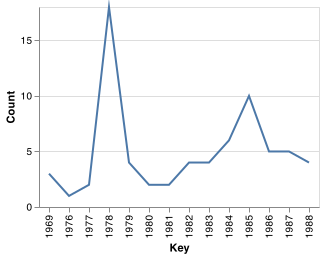

In [76]:
df_sightingsByYear |> 
    @vlplot(:line, 
        x = {field=:Key, type=:ordinal}, 
        y = {field=:Count, type=:quantitative})